# WGAN-GP Training

## imports

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle


Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [4]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 1 classes.


In [ ]:
x_train[0][0][0]

array([[[ 0.5058824 ,  0.56078434,  0.6392157 ],
        [ 0.5058824 ,  0.56078434,  0.6392157 ],
        [ 0.5058824 ,  0.56078434,  0.6392157 ],
        ...,
        [ 0.5294118 ,  0.58431375,  0.64705884],
        [ 0.5294118 ,  0.58431375,  0.64705884],
        [ 0.52156866,  0.5764706 ,  0.6392157 ]],

       [[ 0.52156866,  0.5764706 ,  0.654902  ],
        [ 0.52156866,  0.5764706 ,  0.654902  ],
        [ 0.52156866,  0.5764706 ,  0.654902  ],
        ...,
        [ 0.54509807,  0.6       ,  0.6627451 ],
        [ 0.54509807,  0.6       ,  0.6627451 ],
        [ 0.54509807,  0.6       ,  0.6627451 ]],

       [[ 0.52156866,  0.5764706 ,  0.654902  ],
        [ 0.5294118 ,  0.58431375,  0.6627451 ],
        [ 0.5372549 ,  0.5921569 ,  0.67058825],
        ...,
        [ 0.56078434,  0.6156863 ,  0.6784314 ],
        [ 0.56078434,  0.6156863 ,  0.6784314 ],
        [ 0.5529412 ,  0.60784316,  0.67058825]],

       ...,

       [[ 0.5058824 ,  0.58431375,  0.6627451 ],
        [ 0

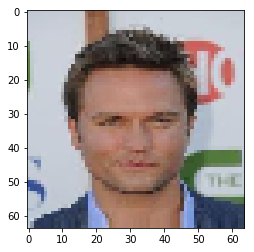

In [ ]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [ ]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))




W0126 22:08:11.356811 140716399138624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0126 22:08:11.371669 140716399138624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0126 22:08:11.385168 140716399138624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0126 22:08:11.492088 140716399138624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0126 22:08:11.551648 14

In [ ]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

In [ ]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
__________

## training

In [ ]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [ ]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
W0126 22:08:14.395804 140716399138624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (0.7)(R -4.9, F -0.1, G 0.6)] [G loss: 0.2]


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 (5, 1) [D loss: (-71.1)(R -127.2, F 8.6, G 4.7)] [G loss: -11.1]
2 (5, 1) [D loss: (-115.1)(R -216.3, F 26.4, G 7.5)] [G loss: -19.4]
3 (5, 1) [D loss: (-128.9)(R -248.6, F 26.8, G 9.3)] [G loss: -15.5]
4 (5, 1) [D loss: (-116.8)(R -195.6, F 13.7, G 6.5)] [G loss: -9.5]
5 (5, 1) [D loss: (-120.1)(R -207.3, F 16.3, G 7.1)] [G loss: -10.0]
6 (5, 1) [D loss: (-125.6)(R -201.5, F 18.7, G 5.7)] [G loss: -25.3]
7 (5, 1) [D loss: (-116.2)(R -237.8, F 24.2, G 9.7)] [G loss: -10.5]
8 (5, 1) [D loss: (-109.2)(R -187.2, F 27.2, G 5.1)] [G loss: -29.3]
9 (5, 1) [D loss: (-119.8)(R -177.0, F 14.1, G 4.3)] [G loss: -28.7]
10 (5, 1) [D loss: (-118.8)(R -213.0, F 23.0, G 7.1)] [G loss: -3.1]
11 (5, 1) [D loss: (-104.7)(R -187.7, F 16.2, G 6.7)] [G loss: -10.7]
12 (5, 1) [D loss: (-106.1)(R -145.1, F -1.5, G 4.1)] [G loss: -25.9]
13 (5, 1) [D loss: (-111.6)(R -194.6, F 29.6, G 5.3)] [G loss: -23.0]
14 (5, 1) [D loss: (-119.1)(R -210.9, F 24.0, G 6.8)] [G loss: -5.9]
15 (5, 1) [D loss: (-88.0)(R -215.

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
